### Sample notebook to process the postage stamp data
Still a work in progress but postage stamps for ~14 systems in 6 bands with 10-year baselines should be accessible. 

In [ ]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

filename = "/pscratch/sd/v/vpadma/lens_finding/lens_finding_postage_stamps.h5"
bands = ["u", "g", "r", "i", "z", "y"]
lsst_colors = {
    "u": "#0c71ff",
    "g": "#49be61",
    "r": "#c61c00",
    "i": "#ffc200",
    "z": "#f341a2",
    "y": "#5d0000",
}

In [82]:
# TODO: fix metadata section in file
# TODO: generate 1-year data for whole sample
# TODO: don't save every image in a separate dataset, make one n_visit x 33 x 33 array and just store it there
# TODO: store light curve error bars 
# TODO: store PSF + noise maps

With this notebook we provide `lens_finding_postage_stamps.h5`. Here we show the data organization in the h5 file.

In [6]:
with h5py.File(filename, "r") as hf:
    lens_keys = sorted(hf.keys())
    if not lens_keys:
        raise ValueError(f"No lens groups found in {filename}")
    else:
        print(lens_keys)
# there are 14 lenses in 6 bands with 10-year long light curves, postage stamps and metadata

['lsst_lens_0', 'lsst_lens_1', 'lsst_lens_10', 'lsst_lens_11', 'lsst_lens_12', 'lsst_lens_13', 'lsst_lens_2', 'lsst_lens_3', 'lsst_lens_4', 'lsst_lens_5', 'lsst_lens_6', 'lsst_lens_7', 'lsst_lens_8', 'lsst_lens_9']


### pick a specific lens and look at the metadata, light curves and postage stamps

In [7]:
lens_ind = 0
with h5py.File(filename, "r") as hf:
    lens_keys = sorted(hf.keys())
    lens_key = lens_keys[lens_ind] # pick a specific key
    lens_group = hf[lens_key] # all the data for this lens lives under this group
    print(lens_group.keys())
    # lc_group = lens_group["light_curves"]

<KeysViewHDF5 ['light_curves', 'metadata', 'observation_dates', 'postage_stamps']>


As seen in the cell above, each `group` contains light_curves, metadata, observation dates and postage stamps.

#### light curves

In [15]:
lens_ind = 0
with h5py.File(filename, "r") as hf:
    lens_keys = sorted(hf.keys())
    lens_key = lens_keys[lens_ind] # pick a specific key
    lens_group = hf[lens_key] # all the data for this lens lives under this group
    lc_group = lens_group.get("light_curves", None)
    image0 = lc_group['image_0'] # accessing an image; there will be image 0 - 1 (double), 0 - 2 (triple), 0 - 3 (quad)
    image1 = lc_group['image_1']
    g_band_lc0 = image0['g'][:] # accessing a specific band; # other keys are u, r, i, z, y
    

#### observation times

In [ ]:
lens_ind = 0
with h5py.File(filename, "r") as hf:
    lens_keys = sorted(hf.keys())
    lens_key = lens_keys[lens_ind] # pick a specific key
    lens_group = hf[lens_key] # all the data for this lens lives under this group
    obs_group = lens_group.get("observation_dates", None)
    g_band_obs_times = obs_group.get('g')[:] # observation times for a specific band; # other keys are u, r, i, z, y
g_band_obs_times # these are the observation times as provided by the current baseline observing plan on rubin_sim

array([ 122.95355401,  126.94125565,  127.94135454,  128.74303342,
        128.74347927,  430.92534268,  430.9262375 ,  436.92810779,
        456.84731574,  456.84776419,  514.86470191,  534.61856059,
        538.809921  ,  549.75861449,  550.80658616,  574.70406582,
        605.64684938,  782.96107474,  790.91814222,  805.8836477 ,
        947.67199151, 1131.98005702, 1187.86387656, 1217.94768391,
       1250.63946722, 1250.65550965, 1251.63988329, 1251.65594781,
       1252.64030207, 1252.65638968, 1253.64072359, 1253.65683532,
       1601.87659368, 1627.81290903, 1628.78413335, 1628.78458473,
       1636.79811254, 1854.9618552 , 1854.96230042, 1898.89332094,
       1966.89047561, 2050.64610901, 2311.93175818, 2312.73980038,
       2312.74069318, 2372.72285949, 2377.73449616, 2395.71017412,
       2429.66119084, 2665.96347166, 2667.97416487, 2700.90050769,
       2719.61095455, 2719.61140276, 2777.70640875, 2790.63259292,
       2790.63304006, 2962.96854504, 2973.88927861, 2973.89016

#### postage stamps

In [ ]:
lens_ind = 0
with h5py.File(filename, "r") as hf:
    lens_keys = sorted(hf.keys())
    lens_key = lens_keys[lens_ind] # pick a specific key
    lens_group = hf[lens_key] # all the data for this lens lives under this group
    images_group = lens_group["postage_stamps"]
    g_band_postage_stamps = images_group.get('g') # other keys are u, r, i, z, y
    print(len(g_band_postage_stamps.keys()), g_band_postage_stamps.keys()) 
    time0_g_band = g_band_postage_stamps['time_0'][:] # this is just the g-band postage stamp at time 0
    # currently every observation is stored a separate dataset
    # there could be benefits to this if we additionally wanted to store PSFs under every group?
    # I think even then it would be better to store the postage stamps for a single band as a 3d array: n_visits x 33 x 33
    # and then create a separate group for associated data products such as PSFs, noise maps etc

74 <KeysViewHDF5 ['time_0', 'time_1', 'time_10', 'time_11', 'time_12', 'time_13', 'time_14', 'time_15', 'time_16', 'time_17', 'time_18', 'time_19', 'time_2', 'time_20', 'time_21', 'time_22', 'time_23', 'time_24', 'time_25', 'time_26', 'time_27', 'time_28', 'time_29', 'time_3', 'time_30', 'time_31', 'time_32', 'time_33', 'time_34', 'time_35', 'time_36', 'time_37', 'time_38', 'time_39', 'time_4', 'time_40', 'time_41', 'time_42', 'time_43', 'time_44', 'time_45', 'time_46', 'time_47', 'time_48', 'time_49', 'time_5', 'time_50', 'time_51', 'time_52', 'time_53', 'time_54', 'time_55', 'time_56', 'time_57', 'time_58', 'time_59', 'time_6', 'time_60', 'time_61', 'time_62', 'time_63', 'time_64', 'time_65', 'time_66', 'time_67', 'time_68', 'time_69', 'time_7', 'time_70', 'time_71', 'time_72', 'time_73', 'time_8', 'time_9']>


In [ ]:
### how much flux in image
-2.5*np.log10(np.mean(time0_g_band)) + 28.51, g_band_lc0 # 28.51 is the g-band ZP

(np.float64(22.638760160589033),
 array([19.01106693, 19.02385195, 19.02648805, 19.02860114, 19.02860232,
        19.20857655, 19.20857695, 19.21678775, 19.20161836, 19.2016189 ,
        19.25399239, 19.23161113, 19.22844709, 19.21978224, 19.22040105,
        19.24549194, 19.269031  , 19.19503434, 19.203196  , 19.22774722,
        19.25163372, 19.22471043, 19.17183168, 19.18164483, 19.18662911,
        19.1866277 , 19.18654147, 19.18654006, 19.18654544, 19.18655098,
        19.18705285, 19.18707077, 19.04378155, 18.98454294, 18.98606107,
        18.98606178, 19.00023767, 19.04600303, 19.0460029 , 19.06519953,
        19.12212428, 19.12549521, 19.24746318, 19.24811551, 19.24811529,
        19.30226689, 19.30484774, 19.30084989, 19.35335964, 19.52558374,
        19.53300403, 19.47392141, 19.45824312, 19.45824338, 19.36859255,
        19.35353835, 19.35353788, 19.23562477, 19.21246612, 19.2124659 ,
        19.23505845, 19.2350594 , 19.21116672, 19.27320329, 19.35787908,
        19.3756018

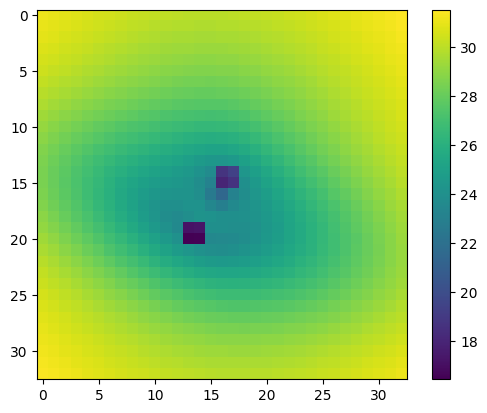

In [ ]:
plt.imshow(-2.5*np.log10(time0_g_band) + 28.51, norm='linear')
plt.colorbar(); ### looking at the image, it looks like the flux in the light curve and image is consistent

#### metadata

This section is under construction, the metadata information was not save properly

### visualizing images and light curves

In [42]:
def asinh_stretch(img, vmin, vmax, scale=10.0):
    img = np.clip(img, vmin, vmax)
    if vmax > vmin:
        scaled = (img - vmin) / (vmax - vmin)
    else:
        scaled = np.zeros_like(img)
    return np.arcsinh(scale * scaled) / np.arcsinh(scale)

Using lens group: lsst_lens_0


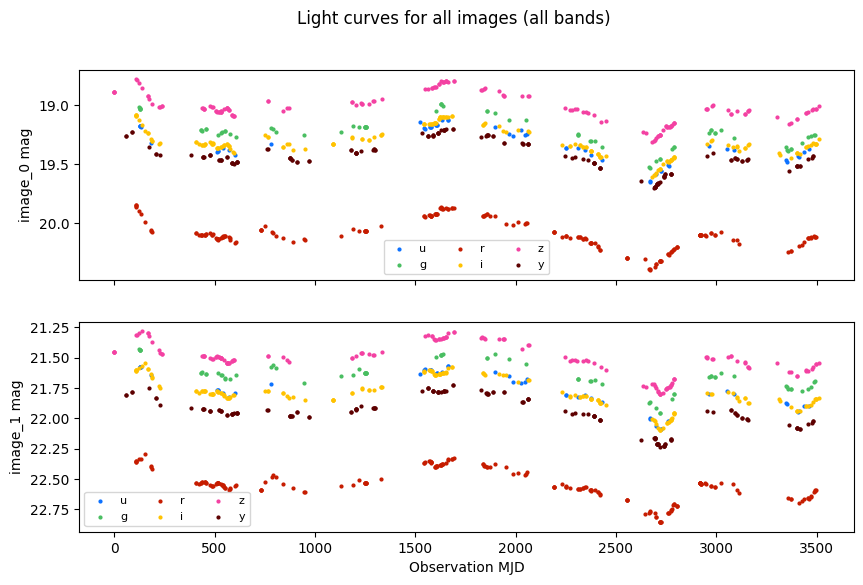

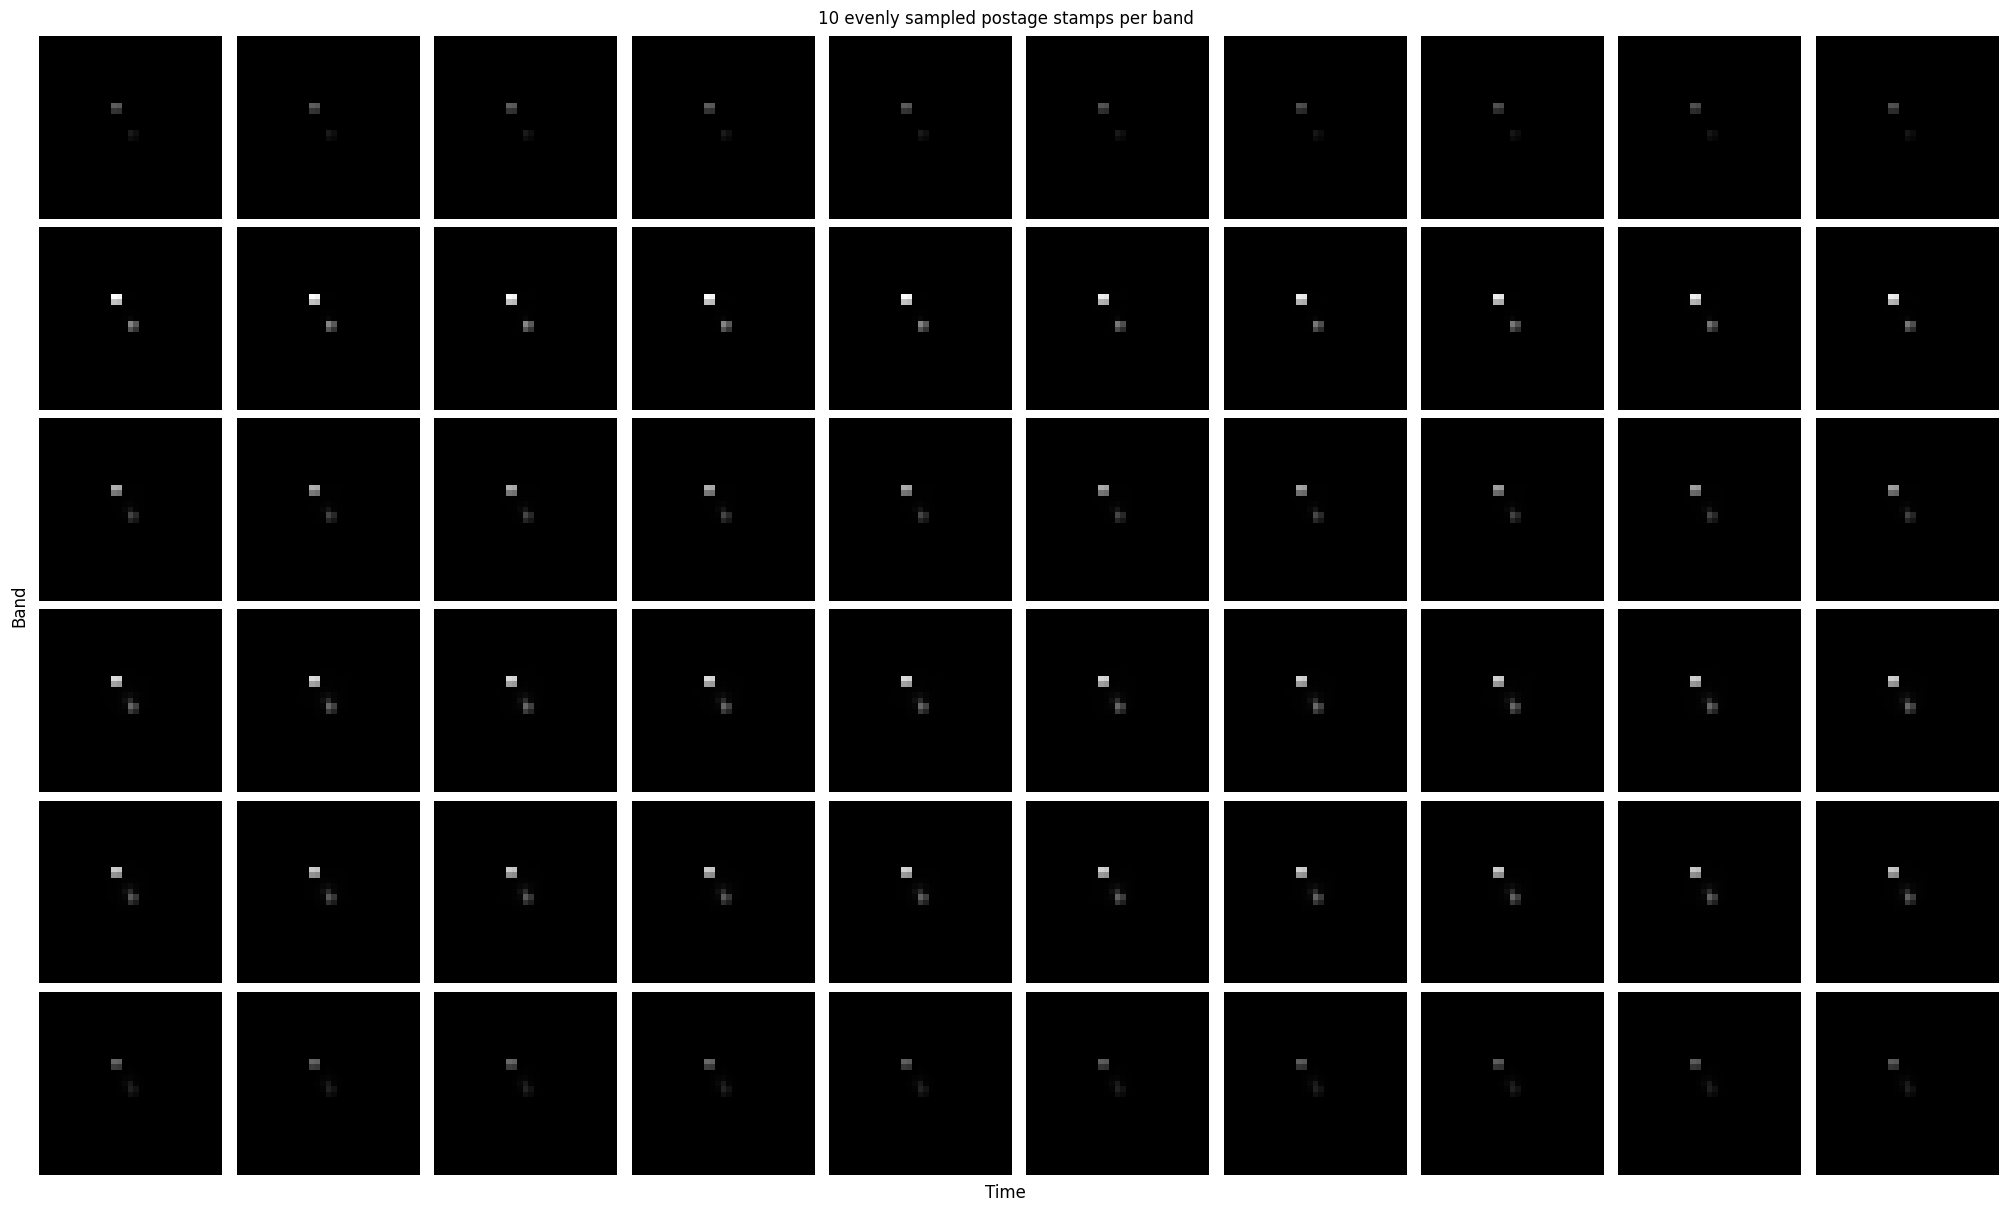

In [48]:
with h5py.File(filename, "r") as hf:
    lens_keys = sorted(hf.keys())
    if not lens_keys:
        raise ValueError(f"No lens groups found in {filename}")
    lens_key = lens_keys[0]
    lens_group = hf[lens_key]
    lc_group = lens_group["light_curves"]
    obs_group = lens_group.get("observation_dates", None)
    image_keys = sorted(lc_group.keys(), key=lambda k: int(k.split("_")[1]))
    print(f"Using lens group: {lens_key}")

    ### plotting the lc
    n_images = len(image_keys)
    fig, axes = plt.subplots(
        n_images, 1, figsize=(10, 3 * n_images), sharex=True
    )
    if n_images == 1:
        axes = [axes]
    for idx, image_key in enumerate(image_keys):
        ax = axes[idx]
        for band in bands:
            mags = lc_group[image_key][band][()]
            times = obs_group[band][:]
            color = lsst_colors.get(band, None)
            ax.scatter(times, mags, s=4, label=band, color=color)
        ax.invert_yaxis()
        ax.set_ylabel(f"{image_key} mag")
        ax.legend(ncol=3, fontsize=8)
    axes[-1].set_xlabel("Observation MJD" if obs_group is not None else "Time index")
    fig.suptitle("Light curves for all images (all bands)")
    plt.show()

    ### image norm
    images_group = lens_group["postage_stamps"]
    all_images = []
    for band in bands:
        band_group = images_group[band]
        time_keys = sorted(
            band_group.keys(), key=lambda k: int(k.split("_")[1])
        )
        for tk in time_keys:
            all_images.append(band_group[tk][()])
    global_min = min(img.min() for img in all_images)
    global_max = max(img.max() for img in all_images)

    num_samples = 10
    fig, axes = plt.subplots(
        len(bands), num_samples, figsize=(2 * num_samples, 2 * len(bands)), constrained_layout=True
    )
    for bi, band in enumerate(bands):
        band_group = images_group[band]
        time_keys = sorted(
            band_group.keys(), key=lambda k: int(k.split("_")[1])
        )
        n_times = len(time_keys)
        for j in range(num_samples):
            ax = axes[bi, j]
            img = band_group[f'time_{j}'][:]
            img_s = asinh_stretch(img, global_min, global_max)
            ax.imshow(img_s, origin="lower", cmap="gray", vmin=0, vmax=1)
            # ax.set_title(f"t={tk.split('_')[1]}", fontsize=8)
            ax.axis("off")
        axes[bi, 0].set_ylabel(band)

    fig.supxlabel("Time")
    fig.supylabel("Band")
    fig.suptitle("10 evenly sampled postage stamps per band")
    plt.show()